# Time Series Challenge
1. Plot the time series, along with any logical or necessary differences to get a stationary dataset
2. Generate and interpret a PACF for the time series (and/or its differences)
3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
4. Finally choose one specification and make the case for that as a logical model for your dataset.

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data
Exchange rate for US Dollars to Euros from August 2008 through August 2018 as found at https://fred.stlouisfed.org/series/DEXUSEU

In [2]:
# exchange rate data
USEU_data = pd.read_csv('~/Desktop/Data_Science/DEXUSEU.csv')

USEU_data.head()

,DATE,DEXUSEU
0,2008-08-11,1.4958
1,2008-08-12,1.4905
2,2008-08-13,1.4895
3,2008-08-14,1.4856
4,2008-08-15,1.4695


In [3]:
# Convert exchange rate to a number, with coersion to throw NAs if conversion not possible
USEU_data['rate'] = pd.to_numeric(USEU_data.DEXUSEU, errors='coerce')

USEU_data.shape

(2610, 3)

In [4]:
# Remove NAs
USEU_data.dropna(inplace=True)

USEU_data.shape

(2509, 3)

In [5]:
USEU_data.head()

,DATE,DEXUSEU,rate
0,2008-08-11,1.4958,1.4958
1,2008-08-12,1.4905,1.4905
2,2008-08-13,1.4895,1.4895
3,2008-08-14,1.4856,1.4856
4,2008-08-15,1.4695,1.4695


In [20]:
USEU_data.describe()

,rate,diff_1
count,2509.000000,2508.000000
mean,1.267092,-0.000142
std,0.119001,0.008304
min,1.037500,-0.042300
25%,1.155900,-0.004500
50%,1.292600,-0.000100
75%,1.360000,0.004200
max,1.510000,0.062000


Text(0.5,1,'Histogram of Exchange Rates')

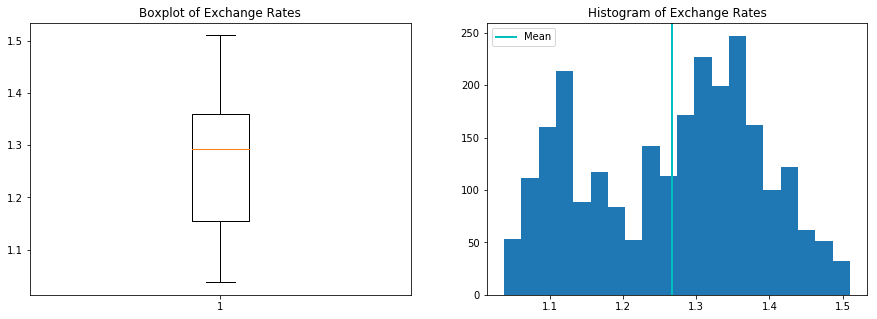

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(USEU_data.rate.dropna(how = 'any'))
plt.title('Boxplot of Exchange Rates')

plt.subplot(1, 2, 2)
plt.hist(USEU_data.rate.dropna(how = 'any'), bins=20)
plt.axvline(USEU_data.rate.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Histogram of Exchange Rates')

The exchange shows an average over the ten-year period of about $1.27 to the Euro.  The exchange rate values are not normally distributed.

## 1. Plot the time series, along with any logical or necessary differences to get a stationary dataset

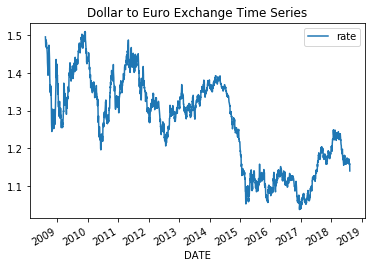

In [8]:
# convert index to datetime
USEU_data.index = pd.to_datetime(USEU_data.DATE)
USEU_data.plot()
plt.title('Dollar to Euro Exchange Time Series')
plt.show()

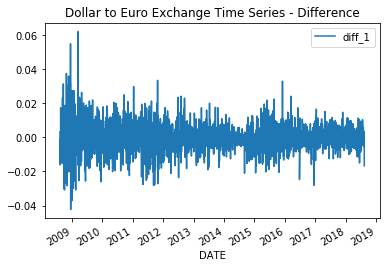

In [9]:
USEU_data['diff_1'] = USEU_data.rate - USEU_data.rate.shift()
USEU_data.plot(y='diff_1')
plt.title('Dollar to Euro Exchange Time Series - Difference')
plt.show()

Plotting the difference in the exchange rate from one day to the previous shows a stationary dataset.  Greater volatility is observed in the exchange rate in 2008 and 2009, with noticeable smaller extremes after 2009.  There is a significant drop in the exchange rate in 2014.

## 2. Generate and interpret a PACF for the time series (and/or its differences)

Text(0.5,1,'Dollar to Euro Exchange PACF')

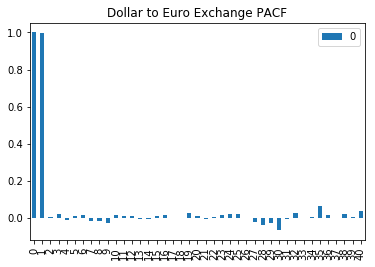

In [10]:
x_acf = pd.DataFrame(pacf(USEU_data.rate))
x_acf.plot(kind='bar')
plt.title("Dollar to Euro Exchange PACF")

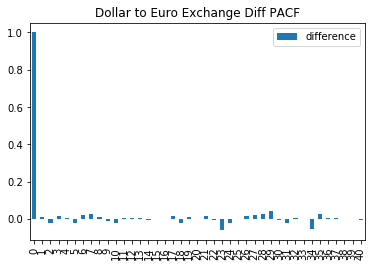

In [11]:
x_acf = pd.DataFrame(pacf(USEU_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Dollar to Euro Exchange Diff PACF")
plt.legend(['difference'])
plt.show()

Running a PACF of the original exchange rate values shows strong auto-correlation at 1.  The PACF of the exchange rate difference values shows no notable auto-correlation.

## 3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

### Models

In [12]:
model_010 = ARIMA(USEU_data.rate, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 2508
Model:                 ARIMA(0, 1, 0)   Log Likelihood                8457.588
Method:                           css   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16911.176
Time:                        19:43:56   BIC                         -16899.522
Sample:                             1   HQIC                        -16906.946
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.856      0.392      -0.000       0.000
Residuals Description
count    2.508000e+03
mean     2.637813e-10
std      8.304288e-03
min     -4.215809e-02
25%     -4.358094e-03

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [28]:
from statsmodels.tsa.arima_model import ARIMA
model_100 = ARIMA(USEU_data.rate, order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 2509
Model:                     ARMA(1, 0)   Log Likelihood                8458.841
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16911.683
Time:                        21:13:21   BIC                         -16894.200
Sample:                             0   HQIC                        -16905.337
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2817      0.071     17.989      0.000       1.142       1.421
ar.L1.rate     0.9980      0.001    801.730      0.000       0.996       1.000
                                    Roots           

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
from statsmodels.tsa.arima_model import ARIMA
model_200 = ARIMA(USEU_data.rate, order=(2,0,0))
model_200_fit = model_200.fit()
print(model_200_fit.summary())
print('Residuals Description')
print(model_200_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 2509
Model:                     ARMA(2, 0)   Log Likelihood                8459.032
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16910.064
Time:                        21:14:39   BIC                         -16886.753
Sample:                             0   HQIC                        -16901.602
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2814      0.070     18.209      0.000       1.143       1.419
ar.L1.rate     1.0103      0.020     50.605      0.000       0.971       1.049
ar.L2.rate    -0.0123      0.020     -0.618      0.5

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
from statsmodels.tsa.arima_model import ARIMA
model_101 = ARIMA(USEU_data.rate, order=(1,0,1))
model_fit = model_101.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 2509
Model:                     ARMA(1, 1)   Log Likelihood                8459.041
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16910.082
Time:                        19:43:56   BIC                         -16886.772
Sample:                             0   HQIC                        -16901.621
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2814      0.070     18.217      0.000       1.143       1.419
ar.L1.rate     0.9980      0.001    786.533      0.000       0.995       1.000
ma.L1.rate     0.0130      0.021      0.632      0.5

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model_211 = ARIMA(USEU_data.rate, order=(2,1,1))
model_211_fit = model_211.fit()
print(model_211_fit.summary())
print('Residuals Description')
print(model_211_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 2508
Model:                 ARIMA(2, 1, 1)   Log Likelihood                8458.624
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16907.249
Time:                        19:43:57   BIC                         -16878.112
Sample:                             1   HQIC                        -16896.673
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001      0.000     -0.863      0.388      -0.000       0.000
ar.L1.D.rate    -0.2492      0.404     -0.617      0.537      -1.041       0.542
ar.L2.D.rate    -0.0228      0.021     -1.06

In [25]:
model_411 = ARIMA(USEU_data.rate, order=(4,1,1))
model_411_fit = model_411.fit()
print(model_411_fit.summary())
print('Residuals Description')
print(model_411_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 2508
Model:                 ARIMA(4, 1, 1)   Log Likelihood                8459.244
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16904.488
Time:                        20:53:35   BIC                         -16863.698
Sample:                             1   HQIC                        -16889.682
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001      0.000     -0.847      0.397      -0.000       0.000
ar.L1.D.rate    -0.5960      0.356     -1.675      0.094      -1.294       0.102
ar.L2.D.rate    -0.0171      0.024     -0.72

In [16]:
model_201 = ARIMA(USEU_data.rate, order=(2,0,1))
model_201_fit = model_201.fit()
print(model_201_fit.summary())
print('Residuals Description')
print(model_201_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 2509
Model:                     ARMA(2, 1)   Log Likelihood                8459.450
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16908.899
Time:                        19:43:58   BIC                         -16879.761
Sample:                             0   HQIC                        -16898.323
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2814      0.070     18.210      0.000       1.143       1.419
ar.L1.rate     0.4940      0.379      1.303      0.193      -0.249       1.237
ar.L2.rate     0.5029      0.378      1.329      0.1

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model_102 = ARIMA(USEU_data.rate, order=(1,0,2))
model_102_fit = model_102.fit()
print(model_102_fit.summary())
print('Residuals Description')
print(model_102_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 2509
Model:                     ARMA(1, 2)   Log Likelihood                8459.703
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 22 Aug 2018   AIC                         -16909.405
Time:                        19:43:58   BIC                         -16880.267
Sample:                             0   HQIC                        -16898.829
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2819      0.072     17.817      0.000       1.141       1.423
ar.L1.rate     0.9981      0.001    807.590      0.000       0.996       1.000
ma.L1.rate     0.0133      0.020      0.663      0.5

In [32]:
model_120 = ARIMA(USEU_data.rate, order=(1,2,0))
model_120_fit = model_120.fit()
print(model_120_fit.summary())
print('Residuals Description')
print(model_120_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D2.rate   No. Observations:                 2507
Model:                 ARIMA(1, 2, 0)   Log Likelihood                7931.174
Method:                       css-mle   S.D. of innovations              0.010
Date:                Wed, 22 Aug 2018   AIC                         -15856.348
Time:                        21:20:39   BIC                         -15838.868
Sample:                             2   HQIC                        -15850.003
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.359e-06      0.000     -0.024      0.981      -0.000       0.000
ar.L1.D2.rate    -0.4821      0.017    -27.551      0.000      -0.516      -0.448
                                    Root

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Results

In [26]:
model_summary = pd.DataFrame()
model_summary['parameters'] = ['0,1,0','1,0,0','1,0,1','2,1,1','2,0,1', '1,0,2', '3,1,1']
model_summary['AIC'] = [-16911.176, -16911.683, -16910.082, -16907.249, -16908.899, -16909.405, -16904.981]
model_summary['BIC'] = [-16899.522, -16894.200, -16886.772, -16878.112, -16879.761, -16880.267, -16870.017]
model_summary

,parameters,AIC,BIC
0,"0,1,0",-16911.176,-16899.522
1,"1,0,0",-16911.683,-16894.200
2,"1,0,1",-16910.082,-16886.772
3,"2,1,1",-16907.249,-16878.112
4,"2,0,1",-16908.899,-16879.761
5,"1,0,2",-16909.405,-16880.267
6,"3,1,1",-16904.981,-16870.017


With each of our models resulting in a negative AIC value, the best result is with the 1, 0, 0 ARIMA model, or an AR1 model.  The next lowest AIC value is with the 0, 1, 0 ARIMA model - this one has the lowest BIC value.  The highest AIC value came from the 2, 1, 1 ARIMA model.

### Residuals

ARIMA(2,1,1) model residuals

Text(0.5,1,'Histogram of Residuals')

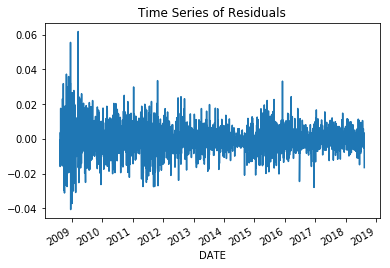

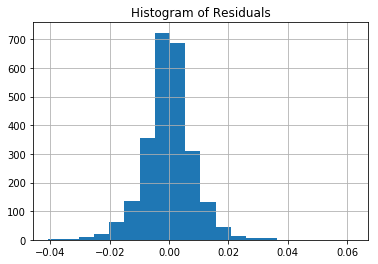

In [19]:
residuals = pd.DataFrame(model_211_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Here we see more extreme residuals during the period of high volitility in 2008 and 2009.  This could likely be explained with further modeling using additional features to reflect the instability of that period.

The residuals appear to be normally distributed.

ARIMA(1,0,0) model residuals

Text(0.5,1,'Histogram of Residuals')

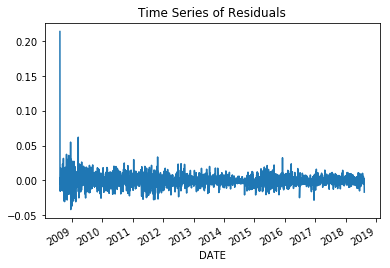

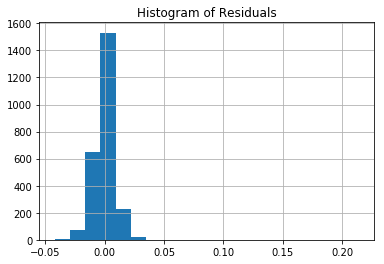

In [34]:
residuals = pd.DataFrame(model_100_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

By visualizing the AR1 model residuals, we can see how it improves on the ARIMA (2, 1, 1).  Although the volitility of 2008 and 2009 is not captured as well, the residuals are overall more frequently very close to 0 and still normally distributed.

ARIMA (0,1,0) Residuals

Text(0.5,1,'Histogram of Residuals')

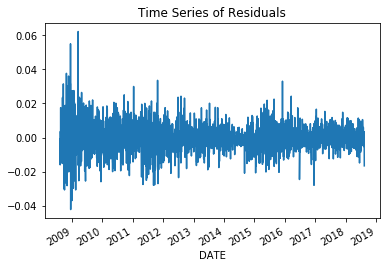

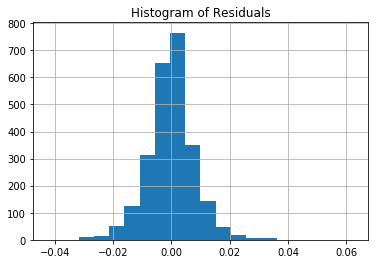

In [35]:
residuals = pd.DataFrame(model_010_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

By plotting the residuals of the ARIMA (0,1,0) model we see that the 2008-2009 volitility is more accurately captured than with the AR1 model.  The distribution of residuals is still normal.

## 4. Finally choose one specification and make the case for that as a logical model for your dataset.

Our testing shows that the ARIMA (0,1,0) model appears to best capture the exchange values, as reflected by the lowest AIC value of -16911.176 and the lowest BIC value at -1689.994.

### Pyramid ARIMA
https://libraries.io/pypi/pyramid-arima

In [38]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(USEU_data.rate, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=-16911.176, BIC=-16899.522, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-16909.475, BIC=-16891.994, Fit time=0.103 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-16909.491, BIC=-16892.009, Fit time=0.030 seconds
Total fit time: 0.430 seconds
-16911.17632420599


Using the Pyramid ARIMA grid search we find the same results - the ARIMA 0,1,0 has the lowest AIC value and is therefore the logical choice for our exchange rate data.